In [1]:
from google.colab import drive
drive.mount("./Project_Data_Science")

Mounted at ./Project_Data_Science


In [2]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()


## Data Preprocessing

1. Read data and show to understand it
2. Handle missing value or invalid value
3. Remove outliers
4. Data Transformation
5. Remove multicollinearity



In [20]:
df = pd.read_csv("/content/Project_Data_Science/MyDrive/Project_Data_Science/Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


**in this data, we need to understand what these column mean**

1. Pregnancies : Số lần mang thai
2. Glucose : chỉ số Glucose
3. BloodPressure: Huyết áp
4. SkinThicknees : Da dày
5. Insulin: chỉ số insullin của một người
6. DiabetesPedigreeFunction : Di truyền bệnh tiểu đường
7. Age : Tuổi
8. Outcome :

    [1] -> mắc bệnh tiểu đường

    [0] -> không mắc bệnh tiểu đường

In [4]:
df["Pregnancies"]

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

**Use matplotlib and seaborn to visualization data**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

target = "Outcome"
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

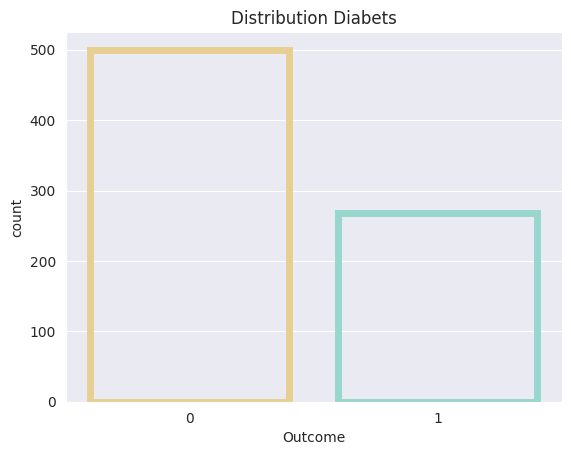

In [6]:
sns.set_style("darkgrid")
plt.title("Distribution Diabets")
sns.countplot(data=df, x = "Outcome", color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2));


*-nhận xét: chúng ta thấy ở đây dữ liệu không quá cân bằng cũng không lệch hẳn về bên nào cho nên cũng không cần thiết phải balance data*

<Axes: >

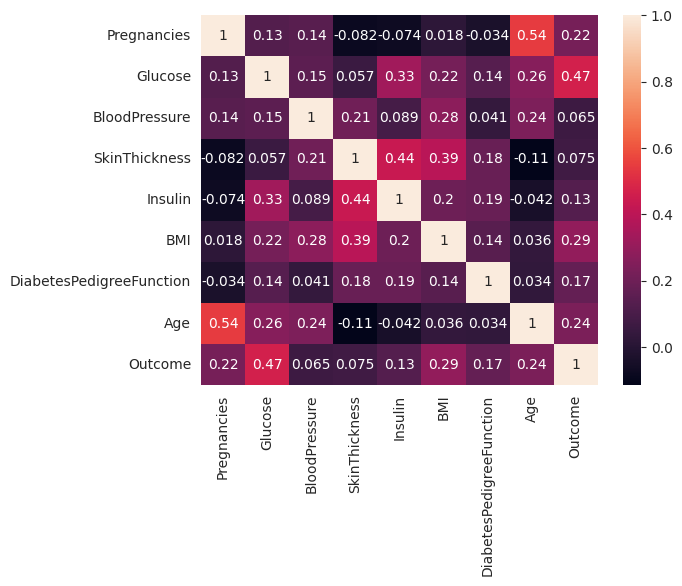

In [7]:
df_corr = df.corr()
df_corr
sns.heatmap(df_corr, annot = True)

In [8]:
#one_like can build a matrix of boolean (True, False) with the same shape as our data
one_corr = np.ones_like(df_corr, dtype = bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [9]:
mask = np.triu(one_corr)
adjusted_mask = mask[1: , :-1]
mask


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [10]:
adjusted_df_corr = df_corr.iloc[1 :, : -1]

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age')]

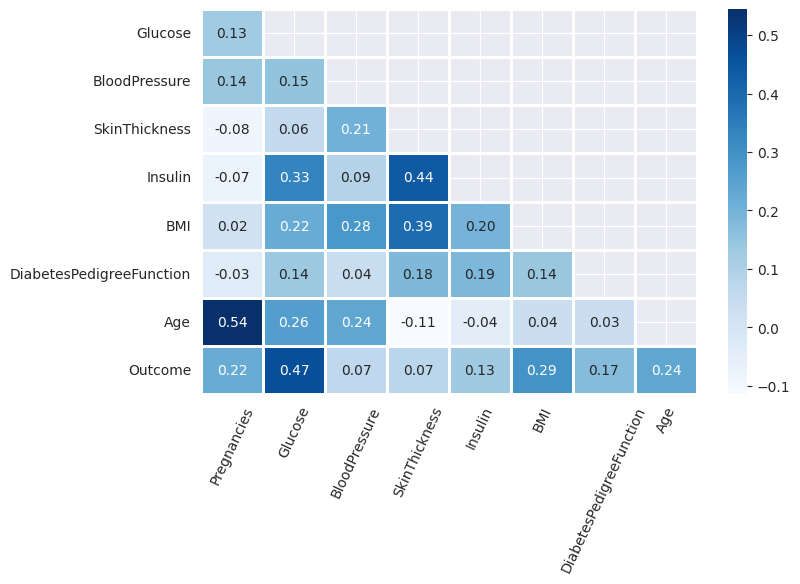

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

sns.heatmap(data = adjusted_df_corr, mask = adjusted_mask, annot=True, fmt =".2f", cmap = "Blues",
            linecolor = "white", linewidth = 1)


ax.set_xticklabels(adjusted_df_corr.columns, fontsize = 10 , rotation= 65
                   )





1.   Nhận thấy ở đây mức độ tương quan không quá cao giữa các feature đối với outcome, cao nhất là 0.47 do đó những mô hình tuyến tính cho bài toán classification sẽ không cho hiệu năng tốt
2.  nhìn vào biểu đồ ta thấy:

    số lần mang thai của một người sẽ tỉ lệ thuận với tuổi, điều này cũng rất đúng trong thực tế

    Và người bị tiểu đường sẽ phụ thuộc vào chỉ số glucose



In [12]:
# Phân chia dữ liệu
X = df.drop(target, axis=1)
Y = df[target]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#tien xu li numerical feature

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

cls = SVC()
cls.fit(x_train, y_train)


SVC()

In [26]:
y_predict = cls.predict(x_test)
for i, j in zip(y_test, y_predict):
  print("Actual {} Predict {}".format(i, j))
print(classification_report(y_test, y_predict))

Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 1
Actual 0 Predict 1
Actual 0 Predict 1
Actual 1 Predict 0
Actual 0 Predict 1
Actual 1 Predict 0
Actual 0 Predict 1
Actual 0 Predict 0
Actual 1 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 1 Predict 1
Actual 1 Predict 1
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 1
Actual 1 Predict 1
Actual 0 Predict 0
Actual 0 Predict 0
Actual 1 Predict 0
Actual 0 Predict 0
Actual 1 Predict 1
Actual 1 Predict 1
Actual 1 Predict 1
Actual 1 Predict 1
Actual 0 Predict 1
Actual 1 Predict 1
Actual 1 Predict 0
Actual 1 Predict 0
Actual 0 Predict 0
Actual 1 Predict 1
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 1
Actual 1 Predict 0
Actual 0 Predict 0
Actual 1 Predict 1
Actual 1 Predict 1
Actual 0 Predict 0
Actual 0 Predict 0
Actual 0 Predict 1
Actual 0 Predict 0
Actual 1 Predict 1
Actual 1 Pre

In [16]:
# cm = np.array(confusion_matrix(y_test, y_predict))
# confusion = pd.DataFrame(cm, index = ["khoe", "benh"], columns=["khoe", "benh"])
# sns.heatmap(confusion, annot = True, fmt = 'g')
# plt.savefig("Confusion Matrix Report")

In [17]:
# params = {
#     "n_estimators": [50, 100, 200],
#     "criterion": ["gini", "entropy", "log_loss"],
#     "max_features": ["sqrt", "log2", None]
# }

# cls = GridSearchCV(RandomForestClassifier(randomstate= 42), param_grid = params, cv = 6, verbose = 1, n_jobs= -1, scoring = "f1")
# cls.fit(x_train, y_train)

# print(cls.best_estimator_)
# print(cls.best_score_)
# print(cls.best_params_)

In [18]:
# pip install lazypredict


In [19]:


# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(x_train, x_test, y_train, y_test)
# print(models)

100%|██████████| 29/29 [00:01<00:00, 18.17it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 